# FYST Holography Data Analysis

## 1. System Configuration and initialization
The initialization process is totally consistent with the the script [Initialization_FYST_holo](1_initialization_FYST_holo.ipynb). If you already run this script. Then we can skip the step 5 'Running the time-consuming first beam calculation'. 

In [1]:
import sys,os
sys.path.append('..')
from ccat_holo.Pyccat import CCAT_holo
import time
import torch as T
import numpy as np
import h5py

from ccat_holo.fitting_error_plot import Fit_M_Surface
from ccat_holo.pyplot import plot_beamcontour

In [2]:
# 1. Model folder
Model_folder='../CCAT_model'
# 2. Configuration of the Holography system
holo_setup={'Rx1':([0,0,600],'../scan/51/on-axis.txt'), 
            'Rx2':([400,400,600],'../scan/51/400_400_600.txt'),
            'Rx3':([400,-400,600],'../scan/51/400_-400_600.txt'),
            'Rx4':([-400,400,600],'../scan/51/-400_400_600.txt'),
            'Rx5':([-400,-400,600],'../scan/51/-400_-400_600.txt')
            }
# Define 5 receiver positions in the 'Coord_Rx' system, e.g [+/-400,+/-400,600]
# and their field points that are stored in file 'scan/400_400_600.txt'. The field
# points of the measured beam maps are from the read out of the telescope coders.
#####################
# 3. Output_folder is the folder used to store the intermediate data of the first
#    beam calculation and the analysing results.
Output_folder='Analysis1'

# 4. Create the FYST holography Model and check the telescope model and 
# holographic setup in the 3D view.
Model=CCAT_holo(Model_folder,Output_folder,holo_conf=holo_setup)

FYST telescope model has been created!!


In [3]:
# 5. Running the time-consuming first beam calculation.
# Model.First_Beam_cal()

# 6. Make the farward beam calculation function, (Model.FF)
Model.mk_FF(fitting_param='panel adjusters',Device=T.device('cpu'))


## 2. Start the fitting process
- Read the measured beams and convert it into a torch.tensor with shape of 10 by N (number of field points).

In [9]:
# 7. fit systematic alignment errors (Large-scale parameters):
'''Meaused data'''
Meas_beam=np.genfromtxt('Meas_beams/GRASP_296GHz_51_51.txt',delimiter=',')
Meas_beam=T.tensor(Meas_beam)


- Fit the large-scale errors in aperture  
The large-scale phase error in aperture can be caused by the pointing offset of the telescope and inaccuracy of the receiver positions. The errors in aperture field amplitude are due to the inconsistency between the designed source beam and the practical Guassian beam.  

Fitting the large-scale aperture errors first can significanly improve the efficiency of the following mirror surface diagnosis. 

The details of the fitting results are stored in a h5py file in the project output folder. 

We can run the code 'Model.fit_LP' to find the 

In [5]:
# 8. Find the large-scale parameters. The fitting results are stored in file 'fit_LP.h5py'
Model.fit_LP(Meas_beam,Device=T.device('cpu'),outputfilename='fit_LP')

res: 6.728268967519449
res: 5.643103886743477
res: 3.639667855054105
res: 3.173570005907653
res: 2.5347312945943585
res: 2.2256706968608144
res: 2.000275001352129
res: 1.6836170461335596
res: 1.5320980213370312
res: 1.4941923290561896
res: 1.4403157913376166
res: 1.4080283043303448
res: 1.3747335337749762
res: 1.3166877299384536
res: 1.2484042587930266
res: 1.1766475798779588
res: 1.0538391789108412
res: 0.8843250654669101
res: 0.8093249216464196
res: 0.8050037772468861
res: 0.7764078873345519
res: 0.7226502618725348
res: 0.6737533566642789
res: 0.6630536369316984
res: 0.6483882485073941
res: 0.6416917718703599
res: 0.6398676298577264
res: 0.6388586479823859
res: 0.638508599974606
res: 0.6383628425479544
res: 0.6382446954223635
res: 0.6381580528182345
res: 0.638119946814019
res: 0.6381079004377859
res: 0.6381035143068834
res: 0.6381014345363363
res: 0.638100429267551
res: 0.6380998608853558
res: 0.6380995687706914
res: 0.6380994671377113
res: 0.6380994373893943
res: 0.6380994226345438


The fitting results are represented as a new object '<em>Model.result_LP<em>'. The fitting solution is Model.result_LP.x. The results are also saved as a h5py file, for example, here the data is stored in file 'Analysis1/fit_LP.h5py'.

In [6]:
# Fitting solution
Model.result_LP.x[0:5*6].reshape(5,-1) # amplitude parameters

array([[ 1.        ,  0.00391724, -0.03790234, -0.03715701, -0.01429649,
        -0.02429823],
       [ 1.        , -0.00809594, -0.04327923,  0.03314417,  0.10731439,
         0.14331109],
       [ 1.        , -0.00365174, -0.03716421,  0.03359783, -0.00202444,
        -0.0429865 ],
       [ 1.        ,  0.01925254, -0.06274475,  0.01044918,  0.05378026,
        -0.03066829],
       [ 1.        , -0.01273641, -0.01901278,  0.02369913, -0.0406991 ,
        -0.05649426]])

In [7]:
Model.result_LP.x[5*6:].reshape(5,-1) # fitted aperture phase errors

array([[ 4.78503770e-16,  2.49001083e+00,  6.87897553e-02,
         6.67332077e-01,  6.69832901e-01],
       [-1.97917551e-16, -3.84484242e+00, -1.66395624e-01,
         8.12940871e-01,  8.44184207e-01],
       [ 1.07239335e-15,  1.12034614e+00,  1.41721367e+00,
         6.31799033e-01,  5.31671461e-01],
       [ 7.36140581e-16,  2.62844875e+00, -1.42586149e+00,
         8.83942085e-01,  7.43174548e-01],
       [ 1.19917597e-15,  3.83535737e+00,  3.77607621e+00,
         5.36706538e-01,  5.38853753e-01]])

In [8]:
# Load the results from h5py file
with h5py.File(Output_folder+'/fit_LP.h5py','r') as f:
    fit_LP=f['x'][:]

**Compre the fitted beams with the perfect beams**  
We can see the pointing errors.

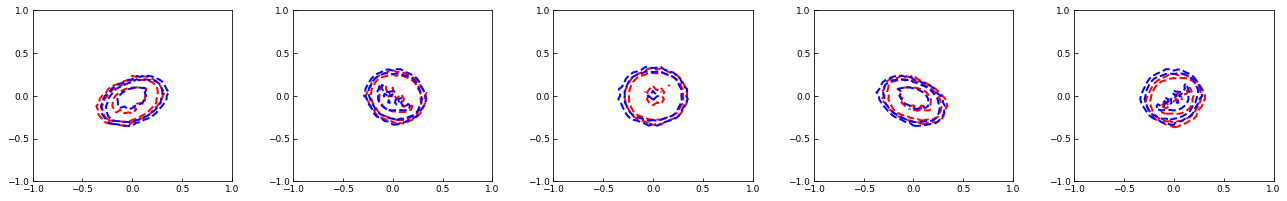

In [9]:
Beams_LP=Model.FF(T.zeros(5*(69+77)),
                  Model.result_LP.x[0:5*6],
                  Model.result_LP.x[5*6:]).numpy()
Beams_ref=Model.FF(T.zeros(5*(69+77)),
                  T.tensor([1,0,0,0,0,0,
                            1,0,0,0,0,0,
                            1,0,0,0,0,0,
                            1,0,0,0,0,0,
                            1,0,0,0,0,0]),
                  T.zeros(5*5)).numpy()
# Blue contour lines represent reference beams.
# Red is the fitted beams for the measured beams. 
x0=np.linspace(-1,1,51)
y0=np.linspace(-1,1,51)
plot_beamcontour(x0,y0,Beams_LP,Beams_ref,
                 levels=[-35,-30,-20,-15])

- Start the mirror surface analysis
The solution of large-scale aperture errors is imported into the surface analysis process. <em>Init_LP=Model.result_LP.x<em>. 


In [10]:
Model.fit_surface(Meas_beam,
                  constraint=[1,1,1,1,1,10],
                  Device=T.device('cpu'),
                  Init_LP=Model.result_LP.x,
                  outputfilename='fit_adjusters')

0.0 0.0 0.0 0.0 0.0
0.0 0.6380993958789973
res: 0.6380993958789973
2.181060098152554e-05 0.00577790337404941 0.0001396720823586689 0.00121106283639872 0.00010953301619331945
0.002845305268924609 5.8119792813130235
res: 5.8476923159122505
2.477206907530033e-06 0.0006562433635647637 1.586369158315063e-05 0.00013755023194331282 1.2440553314030725e-05
3.670440326079556e-05 0.3943329893655987
res: 0.39552460844551945
0.2004566300676014 0.09086827126386363 0.1063200197559317 0.07034727120313994 0.04109491025002587
0.0001817579152669937 0.6320514885147256
res: 1.142956170207958
0.02476154263694173 0.010650376361766752 0.0131205009446289 0.008797698876813434 0.005087625755104452
4.863463070558873e-05 0.38897693078917256
res: 0.45188102167148375
0.00369108578742355 0.0010301432760756964 0.001943430098613164 0.0014162881226852536 0.0007694063597101864
3.8376672505244357e-05 0.39294615187627924
res: 0.4021802722458395
0.00063315234248024 0.00036603112635819686 0.0003213134544116725 0.000345031672

In [3]:
# the solution of the fitted panel adjusters
#Model.result
# read the solution from h5py file
with h5py.File(Output_folder+'/fit_adjusters.h5py','r') as f:
    fit_surface=f['x'][:]

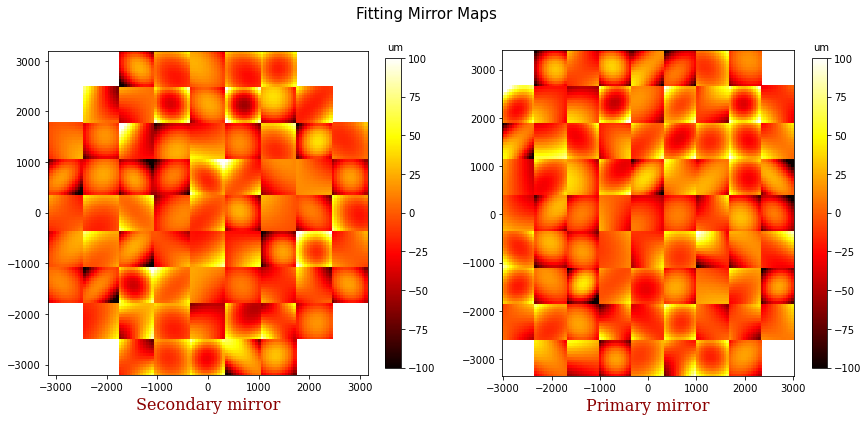

In [4]:
# draw the fitted surface panels
Fit_M_Surface(fit_surface,vmax=100,vmin=-100,model_file='../CCAT_model')

In [7]:
# Compare the fitted beams with the measured beams
F_beams=Model.FF(T.tensor(fit_surface[0:5*(69+77)]),
                 T.tensor(fit_surface[5*(69+77):5*(69+77+6)]),
                 T.tensor(fit_surface[5*(69+77+6):])).numpy() # calculated the fitted beams


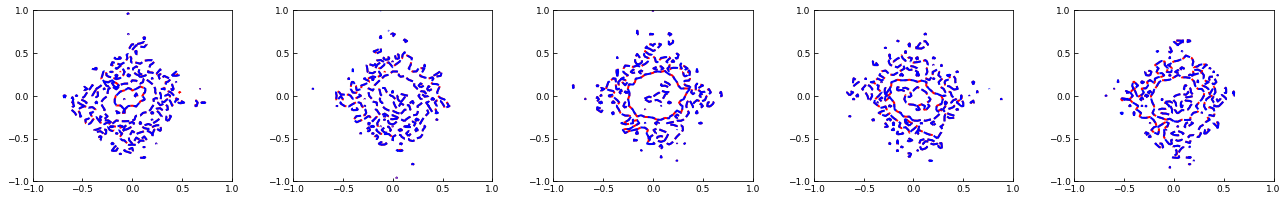

In [14]:
# Blue contour lines represent reference beams.
# Red is the fitted beams for the measured beams. 
x0=np.linspace(-1,1,51)
y0=np.linspace(-1,1,51)
plot_beamcontour(x0,y0,F_beams,Meas_beam,
                 levels=range(-40,10,10))